# 特征工程
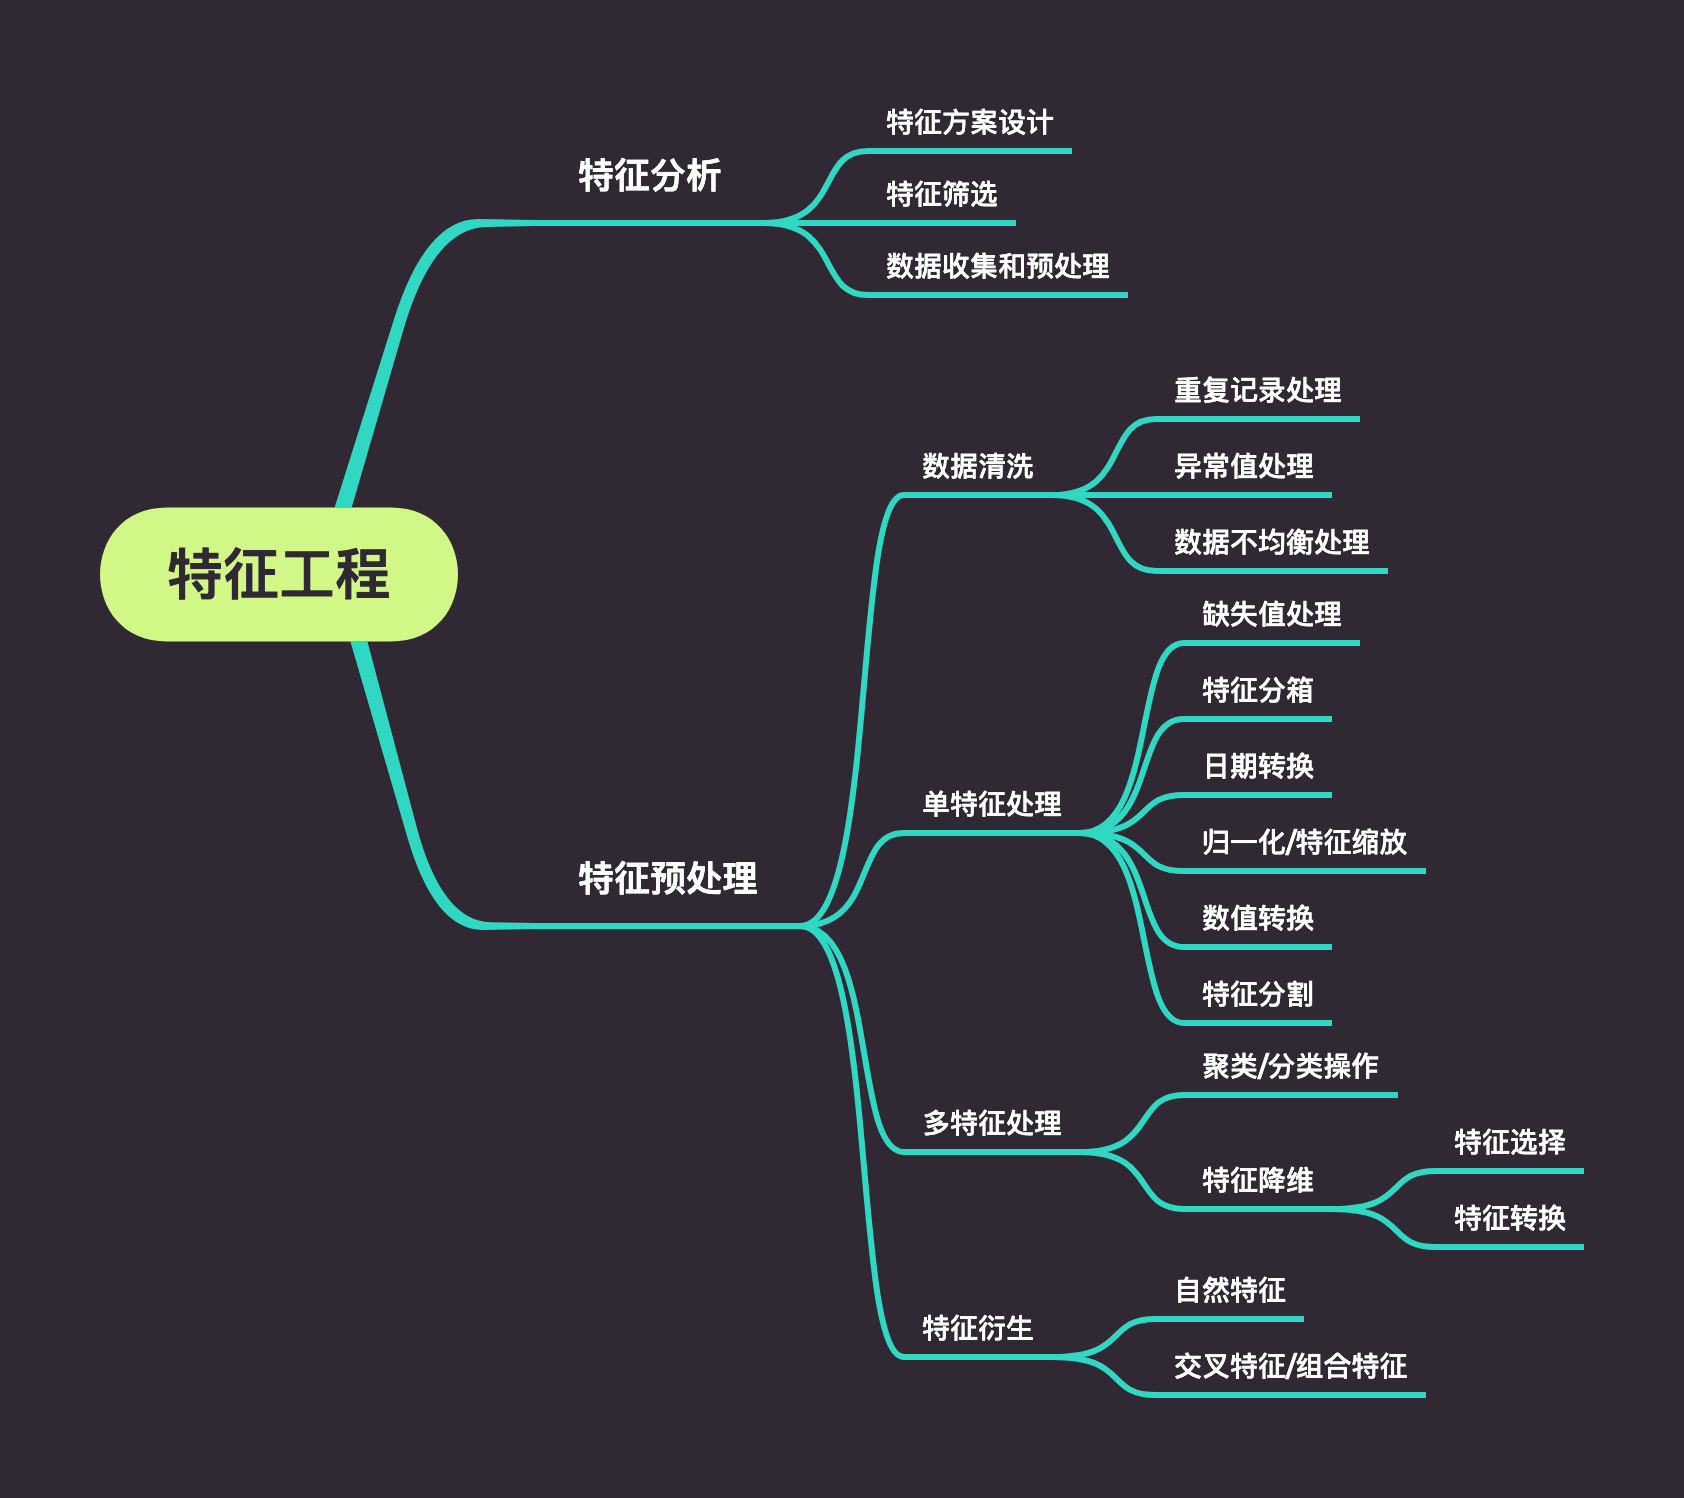
特征工程至关重要，业界流传一句话：“数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限。”**所以，一定一定一定要重视这个过程。**

特征工程不仅仅需要从技术角度进行考虑，还需要通过收益、时间、ROI、敏感度、收集难易度等角度进行分析，需要结合业务现状、团队现状等综合进行分析。

## 特征分析
### 一、特征方案设计

基于对业务的理解，尽可能的找出对因变量有影响的自变量 - 为了实现目标，都需要哪些特征？

**该阶段为头脑风暴阶段，尽可能最大限度的挖掘可以使用的特征，不用计较成本。**

可以通过以下角度找出特征的候选集：
- 基本特征 
- 统计特征
- 复杂特征
- 自然特征

参与角色产品经理、数据分析师、工程师。

### 二、特征筛选

根据特征方案设计的结果，逐个特征从以下几个角度进行分析，决定是否使用该特征。

- 数据获取的难度怎样？

- 准确性如何？

- 覆盖率多少？

- 这些特征该从哪里获取？业务数据？三方爬取？手动标注？难度怎样？

- 数据存储在哪里？是否方便后续的使用？

- 开发周期多久？怎样的迭代步骤？

**该阶段主要是从ROI角度进行分析，初步确定需要使用的特征。**

参与角色产品经理、数据分析师、工程师。

## 特征预处理
### 一、数据清洗

#### 1.1 重复记录处理

- 重复记录是无意义的，需要去重。

- 重复值是有意义的，不需要去重。

In [2]:
import pandas as pd

DATA_PATH = '../data-store/stock-knowledge-graph/data/import/executive.csv'
# 加载csv文件，指定列的数据类型，有助于后续的处理和内存的节省
df = pd.read_csv(DATA_PATH, index_col=0, encoding='utf-8', dtype={'name': str, 'gender': str, 'age:int': int})
print(df.tail(10))
print(df.shape)
# 根据指定列删除记录
df_duplicated = df.drop_duplicates(['name', 'gender', 'age:int'])
print(df_duplicated.shape)

                                 name gender  age:int  :LABEL
person_id:ID                                                 
72c6fcfecc05026e5fa49d2f1d3c56ed   陈农      男       50  Person
feb7d75fb8f2d9a174a70426e26b4339   蔡宁      男       55  Person
6ddbd3b9756215c4b5ade6a4f5d5e25b  黄董良      男       63  Person
638bf43a205386e849bbf413a302069d  刘金成      男       54  Person
18e8f444e2e23fc02e707ced3785ecc1  刘建华      男       44  Person
9c7b2cca1d27c2fd6b8a407a2c474121  艾新平      男       50  Person
9b1923ddb30baba0d2cf1685ed7ada88  袁华刚      男       45  Person
1396d8aa58387a88d60cadfe7942087e  詹启军      男       52  Person
8bd7ff81929b17d8553f97741812756d  雷巧萍      女       50  Person
7e909e208f2ebe1cf6a91e84ee666cb7   吴锋      男       67  Person
(24775, 4)
(20872, 4)


#### 1.2 异常值处理(Handling Outlier)
最好的异常值的分析就是能够将数据可视化，寻找异常值的特点。

其次，使用数学的方法进行检测。

In [3]:
# 使用标准差的方法
# 该值可以设置为2~4之间
factor = 3 
upper_lim = df_duplicated['age:int'].mean() + df_duplicated['age:int'].std() * factor
lower_lim = df_duplicated['age:int'].mean() - df_duplicated['age:int'].std() * factor
df_duplicated = df_duplicated[(df_duplicated['age:int'] < upper_lim) & (df_duplicated['age:int'] > lower_lim)]
print(df_duplicated.tail(10))

# 使用百分比过滤异常值
upper_lim = df_duplicated['age:int'].quantile(0.95)
lower_lim = df_duplicated['age:int'].quantile(0.05)

# 不删除异常值，覆盖异常值
df.loc[(df['age:int'] > upper_lim), 'age:int'] = upper_lim
df.loc[(df['age:int'] < lower_lim), 'age:int'] = lower_lim

                                 name gender  age:int  :LABEL
person_id:ID                                                 
4bcb6b6767184e31217d17959c77f645  冯全宏      男       66  Person
8ffb900d82822bbbcfbd5c7f2973ba25  王掌权      男       49  Person
488310d325c59c7ef9b2d31b45268530  张子和      男       58  Person
06ff2363888ee89db261d7ef27268ab7  邱春方      男       56  Person
638bf43a205386e849bbf413a302069d  刘金成      男       54  Person
18e8f444e2e23fc02e707ced3785ecc1  刘建华      男       44  Person
9c7b2cca1d27c2fd6b8a407a2c474121  艾新平      男       50  Person
1396d8aa58387a88d60cadfe7942087e  詹启军      男       52  Person
8bd7ff81929b17d8553f97741812756d  雷巧萍      女       50  Person
7e909e208f2ebe1cf6a91e84ee666cb7   吴锋      男       67  Person


#### 1.3 数据不均衡处理(Im-balanced Process)

![imbalanced-learn](assets/plot_imbalanced_learn.png)

如上图，在数据样本及其不均匀的情况下，分类的结果会更偏向于数据样本更多的分类。

通常解决该类数据不均衡的问题，有两种办法。

一、数据角度：改变原本不平衡的的数据分布，来获得一个较平衡的数据分布，然后使用相应的学习算法，得到适用的模型。[scikit-learn 团队对于imbalanced-learn文档](https://imbalanced-learn.org/stable/user_guide.html)

二、算法角度：根据数据集的分布情况，改变算法的损失函数进行优化；或者是从不同的不同的角度看待问题，将问题本身考虑为一分类(One Class Learning)或异常检测(Novelty Detection)问题。

In [4]:
# 生成样本数据
from collections import Counter
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=3, 
                           n_clusters_per_class=1, 
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
print(sorted(Counter(y).items()))

[(0, 64), (1, 262), (2, 4674)]


过采样(Over-sampling)，核心思想是增加少数类样本的样本数。

In [5]:
# 朴素随机过采样，随机将少数类样本加入到数据集中。导致样本集中出现重复样本，容易到值模型过拟合
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(X, y)
print('朴素随机过采样：', sorted(Counter(y_resampled).items()))

# 合成少数类过采样技术(SMOTE)，计算少数样本的k近邻点，在k紧邻点中随机选择一个，按照公式生成新的样本。⑴类与类之间的重合⑵合成的新样本对模型的分类没有提供有意义的信息。
# 自适应合成抽样(ADASYN)，与SMOTE相比最大的区别在于能够自动的确定生成多少个少数样本，ADASYN利用数据分布情况自动确定每个少数样本生成的数量，少数类周围的多数样本越多，
# 相当于给每个少数类样本一个权重，少数类样本周围的多数类样本越多，起权重就越高。它的缺点也是会产生类与类之间的显著重叠问题。
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)
print('合成少数类过采样：', sorted(Counter(y_resampled).items()))
X_resampled, y_resampled = ADASYN(random_state=0).fit_resample(X, y)
print('自适应合成抽样：', sorted(Counter(y_resampled).items()))

# SMOTE的变种，Border-line SMOTE寻找处于两个类别边界附近的样本点，由其生成新的样本点，这样合成的点才回提供对模型分类有意义的信息。(这种方法是在国瓷安阳的方法中比较好的方法)
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print('Border-line：',  sorted(Counter(y_resampled).items()))

朴素随机过采样： [(0, 4674), (1, 4674), (2, 4674)]
合成少数类过采样： [(0, 4674), (1, 4674), (2, 4674)]
自适应合成抽样： [(0, 4673), (1, 4662), (2, 4674)]
Border-line： [(0, 4674), (1, 4674), (2, 4674)]


欠采样(Under-sampling)，核心思想是减少多数类样本的样本数。

In [6]:
# 原型生成(prototype generation)，通过聚类多数类数据，再根据一定的机制生成新的数据集
from imblearn.under_sampling import ClusterCentroids
X_resampled, y_resampled = ClusterCentroids(random_state=0).fit_resample(X, y)
print('原型生成：',  sorted(Counter(y_resampled).items()))

# 具体参看https://imbalanced-learn.org/stable/user_guide.html

原型生成： [(0, 64), (1, 64), (2, 64)]


过采样和欠采样的结合

In [7]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print('联合采样SMOTEENN：', sorted(Counter(y_resampled).items()))

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
print('联合过采样SMOTETomek', sorted(Counter(y_resampled).items()))

联合采样SMOTEENN： [(0, 4060), (1, 4381), (2, 3502)]
联合过采样SMOTETomek [(0, 4499), (1, 4566), (2, 4413)]


更多的采样方法，参看[scikit-learn 团队对于imbalanced-learn文档](https://imbalanced-learn.org/stable/user_guide.html)

### 二、单特征预处理
#### 2.1 缺失值(Nan)处理(Imputation)
- 当该列缺失值数量比例很大时，考虑删除该列。
- 当个别行数据缺失时，考虑删除相应行。

缺点
- 减少了数据量，在数据量比较大的时候这种方法往往是最快速有效的。

In [8]:
# 展示缺失的值
df_duplicated[df_duplicated.isnull().values==True]
df_duplicated[df_duplicated['gender'].isnull().values==True]['name']
# 描述数据信息，只能描述数值型的统计信息
df_duplicated.describe()

# 删除缺失值超过90%的列
def delete_missing_col(df, threadhold=0.9):
    meaningful_cols = []
    for col in df.columns:
        if df[col].isnull().sum() < len(df_duplicated) * threadhold:
            meaningful_cols.append(col)
        else:
            print('Delete column: %s'.format(col))
    return df[meaningful_cols].copy()

delete_missing_col(df_duplicated)

,name,gender,age:int,:LABEL
person_id:ID,,,,
dddbd3ad0f2e3fca80da88296298bb51,杜玉岱,男,58,Person
2f867939e123f10437a15a127799248e,延万华,男,45,Person
e68b3ae7a003c60cd9d50e371cdb3529,宋军,男,48,Person
b8b7f9a79ba362a435cbabc863fe7309,周天明,男,50,Person
87deaf5073b7c1ac2f679334efb54d5d,王建业,男,47,Person
...,...,...,...,...
18e8f444e2e23fc02e707ced3785ecc1,刘建华,男,44,Person
9c7b2cca1d27c2fd6b8a407a2c474121,艾新平,男,50,Person
1396d8aa58387a88d60cadfe7942087e,詹启军,男,52,Person


统计值填充。效果一般，相当于人为引入了噪声。

In [9]:
# 设置成0
df_duplicated.fillna(0)
# 设置成中位数
df_duplicated['age:int'].fillna(df_duplicated['age:int'].median())
# 设置成平均数
df_duplicated['age:int'].fillna(df_duplicated['age:int'].mean())
# 前后填充
df_duplicated['gender'].fillna(method='pad')
df_duplicated['gender'].fillna(method='bfill')
# 插值填补，通过两点估计中间点的值
df_duplicated.interpolate()
# 设置成最多出现的种类
df['gender'].fillna(df['gender'].value_counts().idxmax(), inplace=True)

使用模型进行预测，缺点是若果变量和变量之间的相关性不强时，仍然无法准确预测。

In [ ]:
# 使用随机森林进行预测

#### 2.2 特征分箱(Bining) - 特征离散化

特征分箱或者特征离散化，具体有几种方式：
- 序列标号，比如说将成绩数据分成A、B、C、D，这样的数据依然保留的大小的关系

这样做主要有以下几个优势：

- 离散特征的增加和减少都很容易，易于模型的快速迭代。

- 稀疏向量的内积乘法运算速度很快，计算结果方便存储，容易扩展。

- 离散化后的特征对异常的数据有很强的鲁棒性；比如说一个特征是年龄>30是1，否则是0，如果特征没有离散化，一个年龄为300岁的异常数据会给模型带来很大的干扰。

- 逻辑回归属于广义线性模型，表达能力受限；单变量离散化为N个后，每个变量有单独的权重，相当于为模型引入非线性，能够提升表达能力，加大泛化能力。

- 离散化后可以进行特征交叉，由M+N个变量变成M*N个变量，进一步引入非线性，提升表达能力。

- 特征离散化后，模型会更加稳定，比如如果对用户年龄进行离散化后，20~30岁作为一个区间，不会因为一个用户年龄增长了一岁就比那成完全不同的人。处于区间相邻处的样本则会相反，所以怎么划分也考研对于数据的理解能力。

- 离散化后可以使模型更加的robust，防止过拟合。

> 如果这个问题思考地更深一点，其实当前深度学习网络的最后一层，如果是binary classification，其实等同于LR。所以说，通过人工／半人工的方式产生的features，跟深度神经网络（无论之前用了怎样的结构）最后学出来的representation，其实是异曲同工，区别在于深度学习一般而言会学出一个dense representation，而特征工程做出来的是一堆sparse representation。某些时候，人工特征其实跟神经网络经过几层非线性之后的结果是高度相似的。在暴力提取高阶／非线性特征的本事上，机器肯定胜过人类。但是，就算最牛的机器智能，有时候都敌不过一些“人类常识”。尤其是业务的一些逻辑，可以认为是人脑在更大的一个数据集上pre-train出来的一些特征，其包含的信息量一定是大于你用于预测的dataset的。在这种情况下，往往厉害的人工features会outperform暴力的机器方法。所以，特征离散化，从数学角度来说可以认为是增加robustness，但是更重要的，make sense of the data，将数据转变成人类可以理解、可以validate的格式。

#### 2.3 日期转换

日期中通常包含了与时间相关的非常重要的信息，但是模型很难从类似于"01-01-2020"这样的数据中获取到有效的信息，所以需要我们对日期进行转换。

In [15]:
import pandas as pd
from datetime import date

df = pd.DataFrame({'date': [
    '01-01-2018',
    '09-06-2019',
    '03-11-2013',
    '11-12-2011'
]})

# 抽取年月日到不同的特征中
df['date'] = pd.to_datetime(df.date, format='%d-%m-%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# 抽取特征表述时间到当前时间经历的时间长度
df['passed_years'] = date.today().year - df['date'].dt.year
df['passed_months'] = (date.today().year - df['date'].dt.year)*12 + (date.today().month - df['date'].dt.month)

# 抽取一些特定类型的特征，例如：星期几，是否是周末，是否是节假日等
df['day_name'] = df['date'].dt.day_name()
print(df)

        date  year  month  passed_years  passed_months day_name
0 2018-01-01  2018      1             2             26   Monday
1 2019-06-09  2019      6             1              9   Sunday
2 2013-11-03  2013     11             7             76   Sunday
3 2011-12-11  2011     12             9             99   Sunday


#### 2.4 虚拟变量(哑变量 Dummy Coding/One-hot Encoding)

- 热独编码(one-hot)，比如说血型(A、B、AB、O)，热独编码将A型转换成(1,0,0,0),这些特征之间没有大小关系
    - 使用稀疏向量来节省空间
    - 使用特征选择降低维度
    ![虚拟变量和One-hot编码](assets/dummy_variable.jpg)
- 二进制编码，是one-hot的一种进阶版，如上述血型的例子，可以将A型血转换为001,将B型转换成010，节省内存空间
- Helmert Contrast
- Sum Constrast
- Polynomial Constrast
- Backward Difference Contrast

In [25]:
import numpy as np
import pandas as pd

country=['Taiwan','Australia','Ireland','Australia','Ireland','Taiwan']
age=[25,30,45,35,22,36]
salary=[20000,32000,59000,60000,43000,52000]
data = {'Country':country,'Age':age,'Salary':salary}
df = pd.DataFrame(data)
print(df)

# 先将字符串类型转换成数值型类型
from sklearn.preprocessing import LabelEncoder

df['Country'] = LabelEncoder().fit_transform(df['Country'])
print(df)

# 将数值类别转化为Onehot类别
# pandas的方法
country_onehot_encoded = pd.get_dummies(df['Country'])
country_onehot_encoded_df = df.join(country_onehot_encoded).drop('Country', axis=1)
print(country_onehot_encoded_df)

# sklearn的方法
from sklearn.preprocessing import OneHotEncoder
country_onehot_encoded = OneHotEncoder().fit_transform(df.Country.values.reshape(-1, 1)).toarray()
country_onehot_encoded = pd.DataFrame(country_onehot_encoded)
country_onehot_encoded_df = df.join(country_onehot_encoded).drop('Country', axis=1)
print(country_onehot_encoded_df)

     Country  Age  Salary
0     Taiwan   25   20000
1  Australia   30   32000
2    Ireland   45   59000
3  Australia   35   60000
4    Ireland   22   43000
5     Taiwan   36   52000
   Country  Age  Salary
0        2   25   20000
1        0   30   32000
2        1   45   59000
3        0   35   60000
4        1   22   43000
5        2   36   52000
   Age  Salary  0  1  2
0   25   20000  0  0  1
1   30   32000  1  0  0
2   45   59000  0  1  0
3   35   60000  1  0  0
4   22   43000  0  1  0
5   36   52000  0  0  1
   Age  Salary    0    1    2
0   25   20000  0.0  0.0  1.0
1   30   32000  1.0  0.0  0.0
2   45   59000  0.0  1.0  0.0
3   35   60000  1.0  0.0  0.0
4   22   43000  0.0  1.0  0.0
5   36   52000  0.0  0.0  1.0


#### 2.5 归一化/数值缩放(Scaling) - 数据标准化

将有量纲的数据转化为无量纲的数据
- 消除量纲带来的影响
- 梯度下降中收敛速度会比较快

> Tips:
    树模型对于特征的归一化不敏感

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data[:10])

# Normalization 归一化
# 提高迭代求解的速度和精度
from sklearn.preprocessing import MinMaxScaler
print(MinMaxScaler().fit_transform(iris.data[:10]))

# 正则化
from sklearn.preprocessing import Normalizer
print(Normalizer().fit_transform(iris.data[:10]))

# Standardization 标准化
# 在不改变原有分布的基础上，让不同度量之间的特征有可比性
from sklearn.preprocessing import StandardScaler
print(StandardScaler().fit_transform(iris.data[:10]))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[0.7        0.6        0.25       0.33333333]
 [0.5        0.1        0.25       0.33333333]
 [0.3        0.3        0.         0.33333333]
 [0.2        0.2        0.5        0.33333333]
 [0.6        0.7        0.25       0.33333333]
 [1.         1.         1.         1.        ]
 [0.2        0.5        0.25       0.66666667]
 [0.6        0.5        0.5        0.33333333]
 [0.         0.         0.25       0.33333333]
 [0.5        0.2        0.5        0.        ]]
[[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.78417499 0.5663486  0.2468699  0.05808704]
 [0.78010936 0.57660257 0.23742459 0.0508767 ]
 [0.80218

#### 2.6 数值转换

将数值转换成在各种形式，帮助模型更好的拟合数据或者提高运算效率。

In [3]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
print(iris.data[:10])
transfer_data = PolynomialFeatures().fit_transform(iris.data[:10])
df = pd.DataFrame(transfer_data)
print(df)

# 自定义各种转换函数，比如多项式数据转换(PolynomialFeature)
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer
FunctionTransformer(log1p).fit_transform(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
     0    1    2    3    4      5      6     7     8      9    10    11    12  \
0  1.0  5.1  3.5  1.4  0.2  26.01  17.85  7.14  1.02  12.25  4.90  0.70  1.96   
1  1.0  4.9  3.0  1.4  0.2  24.01  14.70  6.86  0.98   9.00  4.20  0.60  1.96   
2  1.0  4.7  3.2  1.3  0.2  22.09  15.04  6.11  0.94  10.24  4.16  0.64  1.69   
3  1.0  4.6  3.1  1.5  0.2  21.16  14.26  6.90  0.92   9.61  4.65  0.62  2.25   
4  1.0  5.0  3.6  1.4  0.2  25.00  18.00  7.00  1.00  12.96  5.04  0.72  1.96   
5  1.0  5.4  3.9  1.7  0.4  29.16  21.06  9.18  2.16  15.21  6.63  1.56  2.89   
6  1.0  4.6  3.4  1.4  0.3  21.16  15.64  6.44  1.38  11.56  4.76  1.02  1.96   
7  1.0  5.0  3.4  1.5  0.2  25.00  17.00  7.50  1.00  11.56  5.10  0.68  2.25   
8  1.0  4.4  2.9  1.4  0.2  19.36  12.76  6.16  0.88   8.41  4.06  0.58  1.96   

array([[1.80828877, 1.5040774 , 0.87546874, 0.18232156],
       [1.77495235, 1.38629436, 0.87546874, 0.18232156],
       [1.74046617, 1.43508453, 0.83290912, 0.18232156],
       [1.7227666 , 1.41098697, 0.91629073, 0.18232156],
       [1.79175947, 1.5260563 , 0.87546874, 0.18232156],
       [1.85629799, 1.58923521, 0.99325177, 0.33647224],
       [1.7227666 , 1.48160454, 0.87546874, 0.26236426],
       [1.79175947, 1.48160454, 0.91629073, 0.18232156],
       [1.68639895, 1.36097655, 0.87546874, 0.18232156],
       [1.77495235, 1.41098697, 0.91629073, 0.09531018]])

Log转换的三点好处：

一、可以处理倾斜的(skewed)数据，使得转换后的数据更接近标准的分布。

二、在很多数值型的数据中，同等数值大小所代表的的含义并不相同。比如说：年龄15岁和20岁与65岁和70岁，背后所代表的含义并不相同。而log转换可以减小这种意义代表的差异。

三、减小异常值得影响。log转换后的结果会减小数据中的方差，使得趋势性的研究更容易判断，在所可视化的时候这种现象尤其明显。

#### 2.7 特征分割

有时候在一个数据中，存在多个维度有用的信息，需要使用分割的方法，将它们分割成多个特征。

### 三、多特征处理
#### 3.1 聚类/分组操作(Grouping Operation)
将近似的数据进行聚类/分组

In [1]:
# 类别特征分组
# 取类别出现最多的值
# 旋转标结构
# 数值型特征可以进行sum和mean的操作

#### 3.2 特征降维(Dimension Reduction)
特征刻画的太细致，会导致特征的数量过多，带来更大的计算量，使得泛化的能力减弱，更容易出现过拟合。所以我们要进行特征的降维/压缩。

##### 3.2.1 特征选择(Feature Selection)

从选择形式上可以分为3种：
- Filter：过滤法，通过设定某种阈值来进行选择
- Wrapper：包装法，根据目标函数对效果进行评分后进行选择
- Embedded：集成法，先使用某些机器学习的算法(RF/GBDT/XGBoost)进行训练，得到各个特征的权值系数，根据系数从大到小排列，在进行选择；L1正则也可以通过稀疏的特性来选择特征。在实际的使用中经常是一边调整模型一边进行特征的选择，提升模型的效果。

以下是一些具体的方法：
- 方差选择法(Variance Threshold)
- 相关系数法/卡方检验法/互信息法(SelectKBest)
- 递归特征消除法(RFE)
- 基于惩罚项的特征选择法/基于GBDT的树模型特征选择法(SelectFromModel)

##### 3.2.2 特征转换
可以使用PCA/LDA对特征进行降维操作。

- PCA(主成分分析)
    - 核心思想是增大投影后数据的方差（信号处理领域中，我们认为信号具有较大的方差，噪声具有较小的方差，信号与噪声之间的信噪比越高，则认为数据的质量越好）
    - 对样本进行中心化处理，让均值为0
    - 求样本的协协方差矩阵
    - 对协方差矩阵进行特征值分解，将特征值从大到小排列
    - 通过特征值前d大对应的特征向量$w_d$，将n维样本映射到d维空间中
    - 对于一些复杂的数据，线性的投影可能无法取得很好的性能，可以使用带有kernel的PCA进行数据降维
    - 无监督的算法，应用在人脸识别中会把脸部信息降维成特征脸(eigenface)
    
    
- LDA(线性判别分析)
    - 核心思想是最大化类间距离和最小化类内距离
    - $w=S_w^{-1}(\mu_1-\mu_2);S_w=\sum(x-\mu_i)(x-\mu_i)^T$
    - LDA算法的主要优点有：
        - 在降维过程中可以使用类别的先验知识经验，而像PCA这样的无监督学习则无法使用类别先验知识。
        - LDA在样本分类信息依赖均值而不是方差的时候，比PCA之类的算法较优。
    
    - LDA算法的主要缺点有：
        - LDA不适合对非高斯分布样本进行降维，PCA也有这个问题。
        - LDA降维最多降到类别数k-1的维数，如果我们降维的维度大于k-1，则不能使用LDA。当然目前有一些LDA的进化版算法可以绕过这个问题。
        - LDA在样本分类信息依赖方差而不是均值的时候，降维效果不好。
        - LDA可能过度拟合数据。
    
- PCA和LDA的区别
    - 相同点：
        - 两者均可以对数据进行降维。
        - 两者在降维时均使用了矩阵特征分解的思想。（求特征值、特征向量）
        - 两者都假设数据符合高斯分布。
    - 不同点：
        - LDA是有监督的降维方法，而PCA是无监督的降维方法
        - LDA降维最多降到类别数k-1的维数，而PCA没有这个限制。
        - LDA除了可以用于降维，还可以用于分类。
        - LDA选择分类性能最好的投影方向，而PCA选择样本点投影具有最大方差的方向。
        - 假设想要从一段音频中提取出人的语音信号，这时可以使用PCA进行降维，。过滤掉一些固定频率(方差较小)的背景噪音。
        - 但如果想从这段音频中区分出哪个音频属于哪个人，那应该使用LDA进行降维，使每个人的声音信号更具有区分性。

### 四、衍生特征

#### 4.1更高级特征抽取(自然特征)
比如通过图片、语音、视频、文本中提取出其中包含的信息。

#### 4.2交叉特征/特征组合
结合多个维度特征，将这些特征进行交叉组合，可以提高复杂关系的拟合能力。

可以使用提升树(GDBT)来学习特征组合的方案。

## 电商应用中的特征工程
15年天池比赛，1000万用户在一个月的行为数据 （11.18~12.18），需要预测的是在12月19日用户的购买情况。

**字段 字段说明 提取说明**

user_id 用户标识 抽样 

item_id 商品标识

Item_title 商品标题

behavior_t ype 用户对商品的行为类型，包括浏览、收藏、加购物车、购买，对应取值分别为1，2，3，4

user_geoh ash 用户位置的空间标识，可以为空由经纬度通过保密的算法生成 

item_category 商品分类标识time行为时间精确到小时级别

**用户特征**

• 用户评分（结合时间） 

• 最大购买量距离预测日时长 

• 用户购买量与浏览量的比值 

• 用户发生二次购买商品数占总购买商品数的比值 

• 浏览过的商品中发生购买的比值 

• 收藏商品中发生购买的比值 

• 加购商品中发生购买的比值 

• 双12期间的浏览量、购买量以及其占用户总浏览、总购买 的比值 

• 双12期间的活跃小时数占总购买的比值 

• 用户近三天四种行为加权

• 用户偏好(长期偏好/短期偏好)

**商品特征**

• 商品评分 

• 商品购买人数占总浏览人数的比值 

• 收藏商品的人中最后发生购买的比例 

• 加购商品的人中最后发生购买的比例 

• 购买商品的人中发生二次购买的比例 

• 商品最大购买量距离预测日时长 

• 商品双12期间的浏览量、购买占总浏览量、购买量的比值 

• 该商品的交互量占该类商品的交互量比值 

• 该商品的购买量占该类商品购买量的比值 

• 图片特征 • 标题特征

**协同特征**

协同特征则是以<用户，商品>作为统计对象，是用来表现某个用户对某件商品的喜 爱程度或是购买的可能性，这一部分特征直接与测试集数据对接，对预测结果起着 决定性的作用。 

• 用户商品对评分 

• 最大交互量距离预测日时长

• 用户对该商品的浏览量占用户总浏览量的比值

• 用户对该商品的购买量占总购买量的比值

• 用户对该商品的活跃小时数占用户总活跃小时数的比值

• 用户双12期间对该商品的活跃量、购买量占总活跃量、购买 量比值

**类别特征**

类别特征对预测的影响主要体现在两个方面：
- 第一，通过对用户对某一类商品的浏 览、收藏、加购、购买情况可以看出用户是否有可能购买该商品（不是误点），以 及用户对这一类商品的偏爱程度；
- 第二，主要是体现在物品竞争上，当我们需要判 断用户是否会购买某个商品，可以看用户在看该商品是还关注了多少同类商品，并借此来评判用户购买该商品的可能性。 

• 对该类别的交互量占用户总交互量的比值

• 对该类别的购买量占用户总购买量的比值

• 用户对该类商品的最大交互量距离预测日时长

• 对某一UI对，用户最后接触该商品的当天浏览、收藏、加购、 购买了多少同类商品

• 用户双12期间对该类商品的交互量、活跃量、购买量占总交 互量、活跃量、购买量的比值

## 用户画像的构建
pass